In [115]:
# Call the necessary library
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import seaborn as sns 


In [116]:
# Upload my Data and filtre it 
light_data=pd.read_csv("players_data_light-2025_2026.csv")   # Load the light dataset
full_data=pd.read_csv("players_data-2025_2026.csv")    # Load the full dataset

In [117]:
light_data['Nation']=light_data['Nation'].apply(lambda x : str(x).split()[-1]) # Extrait only the last country name

In [118]:
features=["Player","Nation","Squad","Comp","Age","MP","Starts","Min","90s","Gls","Ast","G+A","xG","xAG","npxG","G-PK"] # The necessary columns 
df=light_data[light_data["Pos"]=="FW"]
att_data=df[features].reset_index(drop=True).rename(lambda x: x+1) # Create an index for my data

In [119]:
att_data.head() # Display the first five rows

,Player,Nation,Squad,Comp,Age,MP,Starts,Min,90s,Gls,Ast,G+A,xG,xAG,npxG,G-PK
1,Brenden Aaronson,USA,Leeds United,eng Premier League,24.0,4,1,156.0,1.7,0,0,0,0.1,0.5,0.1,0
2,Zakaria Aboukhlal,MAR,Torino,it Serie A,25.0,3,0,69.0,0.8,0,0,0,0.2,0.0,0.2,0
3,Giorgi Abuashvili,GEO,Metz,fr Ligue 1,22.0,3,2,141.0,1.6,0,0,0,0.1,0.1,0.1,0
4,Akor Adams,NGA,Sevilla,es La Liga,25.0,2,2,180.0,2.0,0,1,1,0.7,0.1,0.7,0
5,Che Adams,SCO,Torino,it Serie A,29.0,3,0,83.0,0.9,0,0,0,0.0,0.0,0.0,0


In [120]:
att_data.tail() # Display the last five rows

,Player,Nation,Squad,Comp,Age,MP,Starts,Min,90s,Gls,Ast,G+A,xG,xAG,npxG,G-PK
359,Bertuğ Yıldırım,TUR,Rennes,fr Ligue 1,23.0,1,0,3.0,0.0,0,0,0,0.0,0.2,0.0,0
360,Mattia Zaccagni,ITA,Lazio,it Serie A,30.0,3,3,245.0,2.7,1,0,1,1.2,0.0,1.2,1
361,Nicolò Zaniolo,ITA,Udinese,it Serie A,26.0,1,0,30.0,0.3,0,0,0,0.0,0.0,0.0,0
362,Budu Zivzivadze,GEO,Heidenheim,de Bundesliga,31.0,3,2,124.0,1.4,0,0,0,0.5,0.0,0.5,0
363,Milan Đurić,BIH,Parma,it Serie A,35.0,2,0,9.0,0.1,0,0,0,0.1,0.0,0.1,0


In [121]:
att_data.isnull().sum() # Check the missing Values 

Player    0
Nation    0
Squad     0
Comp      0
Age       2
MP        0
Starts    0
Min       0
90s       0
Gls       0
Ast       0
G+A       0
xG        0
xAG       0
npxG      0
G-PK      0
dtype: int64

In [122]:
att_data["Age"].fillna(att_data["Age"].mean(),inplace=True) # Fill the missing values

C:\Users\aouam\AppData\Local\Temp\ipykernel_12968\3262347218.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  att_data["Age"].fillna(att_data["Age"].mean(),inplace=True) # Fill the missing values


In [123]:
sum(att_data.isnull().sum())   # Second Check (Everything it's good)

0

In [124]:
att_data.duplicated().sum() # No duplicated Values 

np.int64(0)

In [125]:
att_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 363 entries, 1 to 363
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  363 non-null    object 
 1   Nation  363 non-null    object 
 2   Squad   363 non-null    object 
 3   Comp    363 non-null    object 
 4   Age     363 non-null    float64
 5   MP      363 non-null    int64  
 6   Starts  363 non-null    int64  
 7   Min     363 non-null    float64
 8   90s     363 non-null    float64
 9   Gls     363 non-null    int64  
 10  Ast     363 non-null    int64  
 11  G+A     363 non-null    int64  
 12  xG      363 non-null    float64
 13  xAG     363 non-null    float64
 14  npxG    363 non-null    float64
 15  G-PK    363 non-null    int64  
dtypes: float64(6), int64(6), object(4)
memory usage: 48.2+ KB


In [126]:
att_data.describe()

,Age,MP,Starts,Min,90s,Gls,Ast,G+A,xG,xAG,npxG,G-PK
count,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000
mean,25.135734,2.556474,1.589532,139.641873,1.551515,0.493113,0.250689,0.743802,0.509917,0.208264,0.431956,0.421488
std,4.290665,1.143795,1.380448,104.725918,1.163922,0.838857,0.580977,1.111434,0.660161,0.333553,0.558088,0.762578
min,15.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,1.500000,0.000000,44.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,3.000000,1.000000,125.000000,1.400000,0.000000,0.000000,0.000000,0.300000,0.100000,0.200000,0.000000
75%,28.000000,4.000000,3.000000,226.500000,2.500000,1.000000,0.000000,1.000000,0.800000,0.300000,0.700000,1.000000
max,39.000000,5.000000,5.000000,414.000000,4.600000,5.000000,4.000000,8.000000,4.900000,2.100000,4.900000,5.000000


In [127]:
x=att_data.shape
print(f"Number of Rows : {x[0]} \nNumber of Columns : {x[1]}") # See the dimension of our data

Number of Rows : 363 
Number of Columns : 16


In [128]:
# Top 5 by Goals
most_scorred=att_data[["Player","Nation","Gls","Ast","Squad","Comp","Age","MP","Starts","Min","G+A","G-PK"]].sort_values(by="Gls",ascending=False).reset_index().rename(lambda x:x+1)
most_scorred.drop(columns='index',inplace=True)
most_scorred.head()

,Player,Nation,Gls,Ast,Squad,Comp,Age,MP,Starts,Min,G+A,G-PK
1,Erling Haaland,NOR,5,0,Manchester City,eng Premier League,25.0,4,4,338.0,5,5
2,Harry Kane,ENG,5,3,Bayern Munich,de Bundesliga,32.0,3,3,238.0,8,4
3,Kylian Mbappé,FRA,4,1,Real Madrid,es La Liga,26.0,4,4,355.0,5,3
4,Serhou Guirassy,GUI,4,0,Dortmund,de Bundesliga,29.0,3,3,266.0,4,4
5,Frank Magri,CMR,3,0,Toulouse,fr Ligue 1,26.0,4,4,314.0,3,3


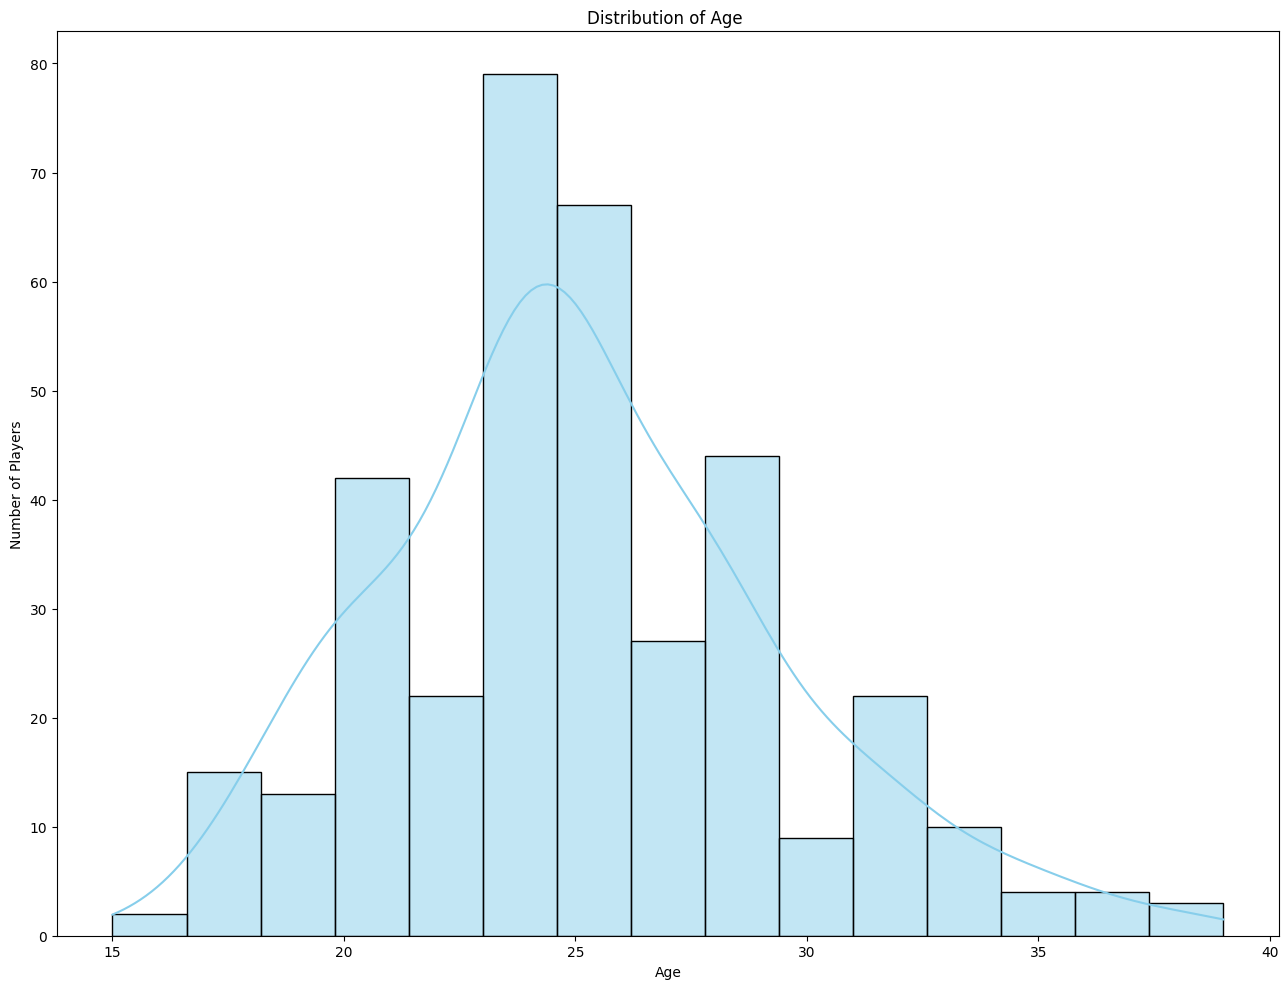

In [222]:
# Distribution of Age 
plt.figure(figsize=(13,10))
sns.histplot(most_scorred["Age"],kde=True,color='skyblue')
plt.xlabel("Age")
plt.ylabel("Number of Players")
plt.title("Distribution of Age ")
plt.tight_layout()

Text(0.5, 1.0, ' Most scored Goals ')

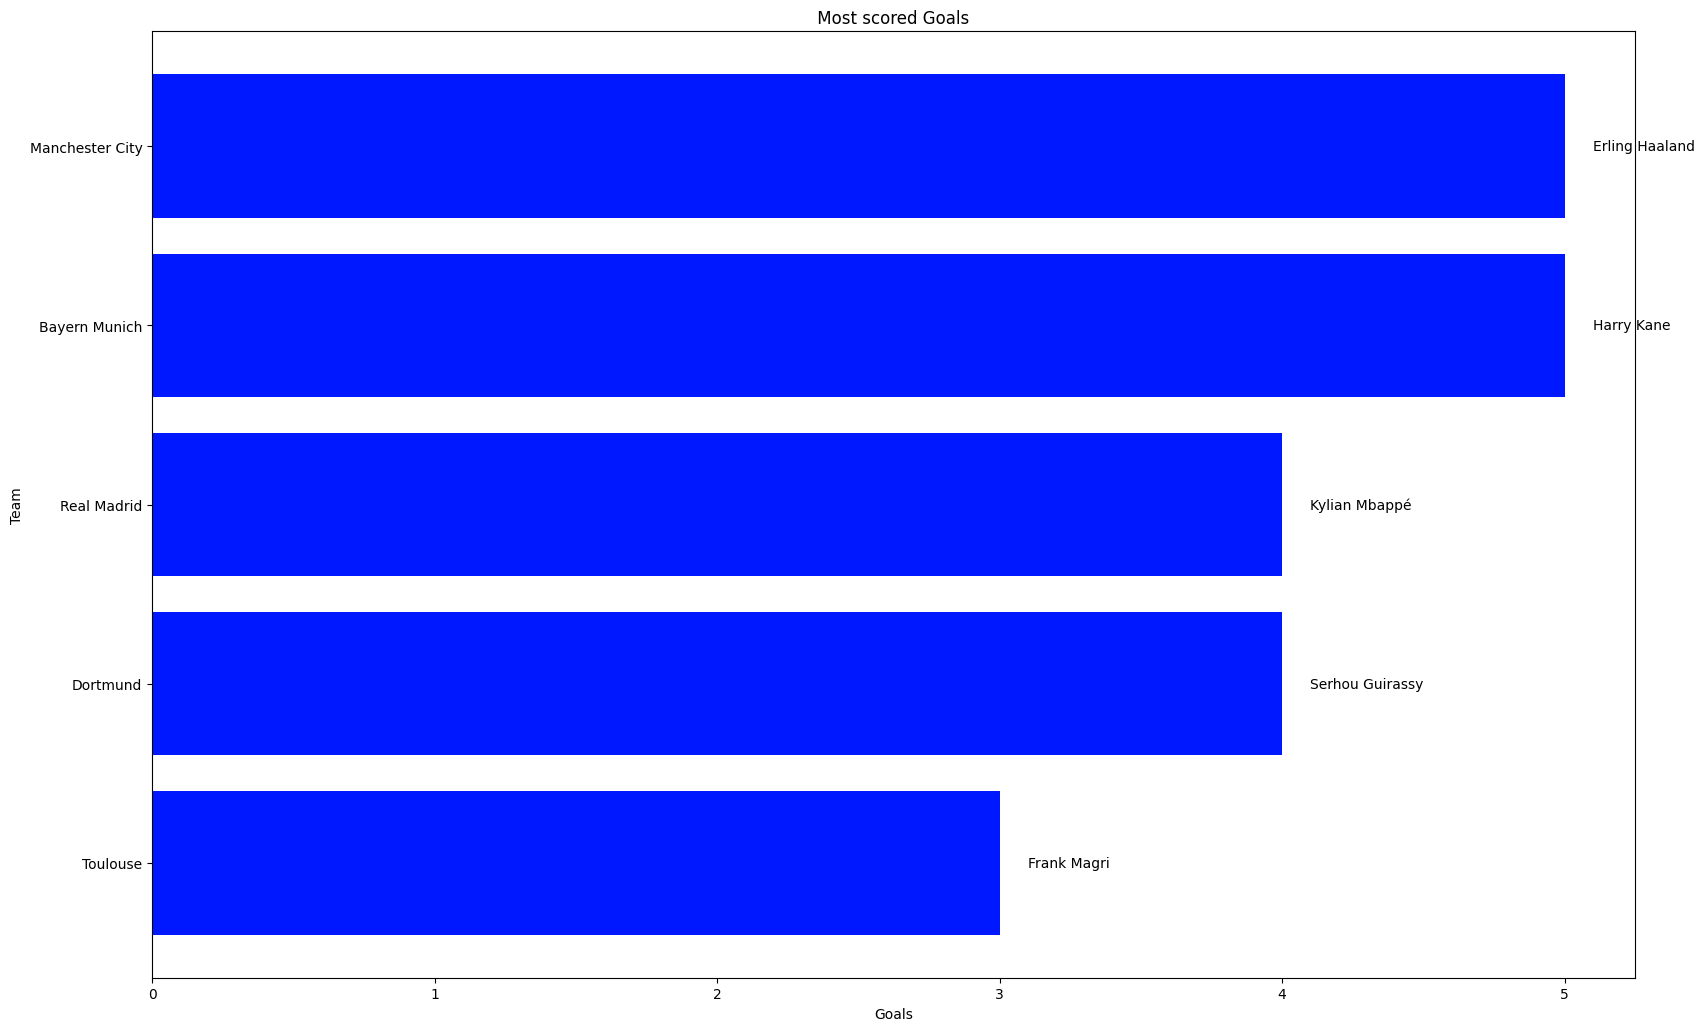

In [129]:
# Most scored Goals
temp=most_scorred[most_scorred["Gls"]>=3].head(5)
plt.figure(figsize=(17,10))
plt.barh(temp["Squad"],temp["Gls"],color='#0018FF')
plt.gca().invert_yaxis()
for i,v in enumerate(temp["Player"]):
    plt.text(temp["Gls"].iloc[i]+0.1,i,v,va='center')
plt.tight_layout()
plt.xlabel("Goals")
plt.ylabel("Team")
plt.title(" Most scored Goals ")


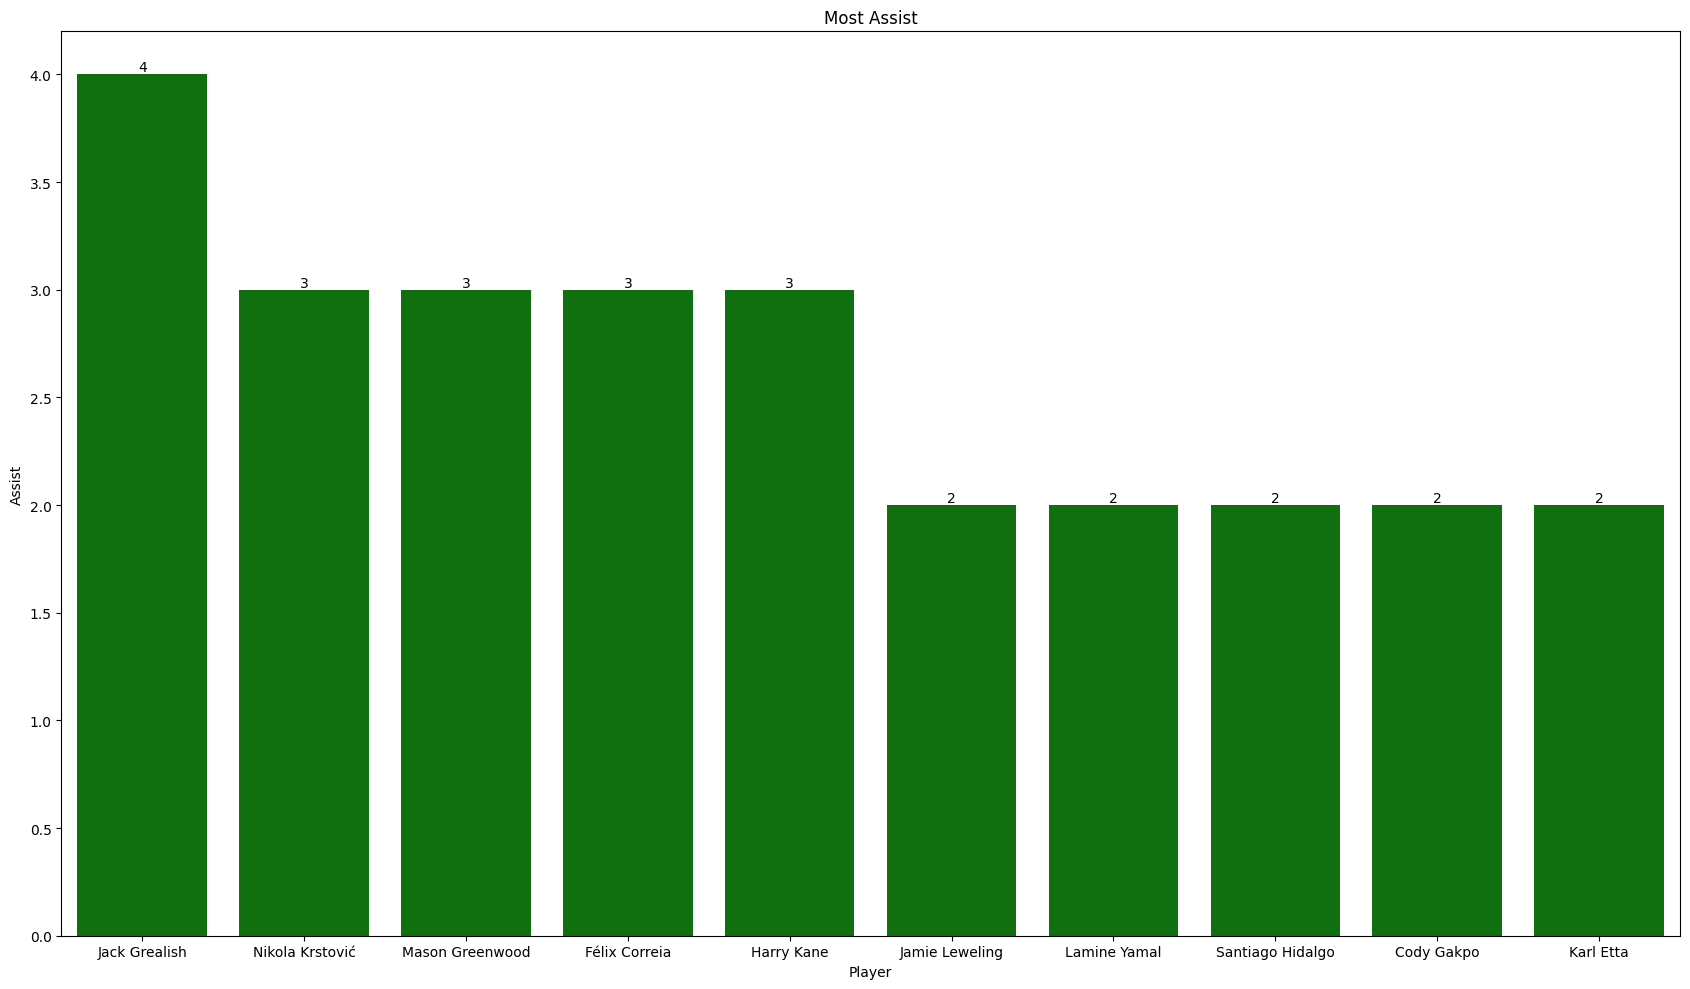

In [221]:
#Most Assist
temp=most_scorred.sort_values(by='Ast',ascending=False).reset_index(drop=True).rename(lambda x:x+1)
temp=temp[temp["Ast"]>1].head(10)
plt.figure(figsize=(17,10))
sns.barplot(x=temp["Player"],y=temp["Ast"],color='green')
for i,v in enumerate(temp["Ast"]):
    plt.text(i,v,str(v),ha='center',va='bottom')
plt.title("Most Assist")
plt.ylabel("Assist")
plt.tight_layout()

Text(0.5, 1.0, 'Most Goals + Assists')

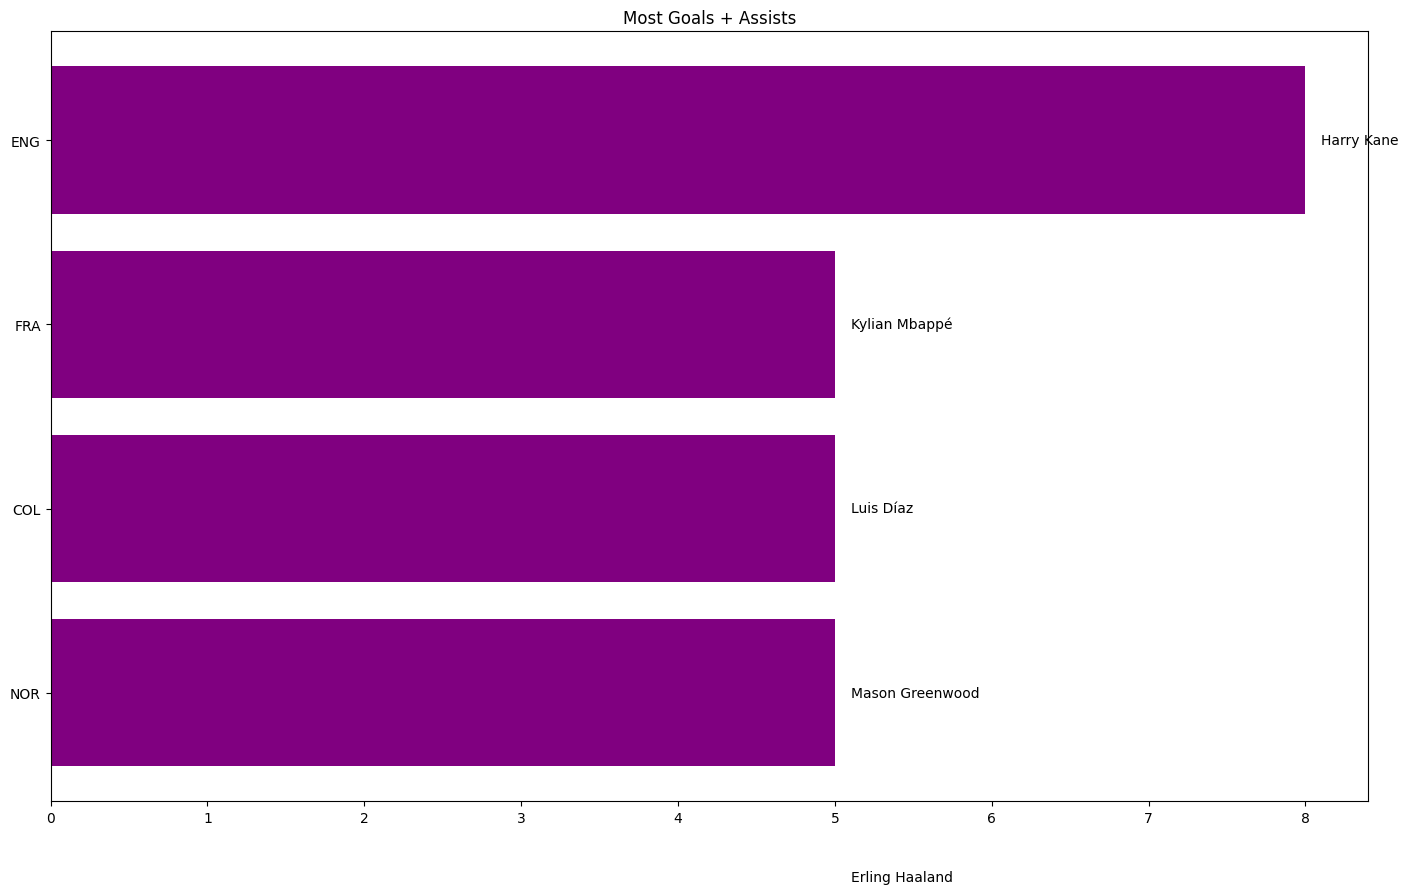

In [163]:
# Most Goals + Assists
temp=most_scorred.sort_values(by='G+A',ascending=False).head(5)
plt.figure(figsize=(17,10))
plt.barh(temp["Nation"],temp["G+A"],color='purple')
plt.gca().invert_yaxis()
for i,player in enumerate(temp["Player"]):
    plt.text(temp["G+A"].iloc[i] +0.1,i,player,va='center')
plt.title("Most Goals + Assists")


In [166]:
# Best Performance
att_data.loc[:,'Points']= att_data["Ast"]*2 + att_data["G-PK"]*3 + (att_data["Gls"] - att_data["G-PK"])*1
features=["Player","Points","Comp","Squad","Age","Nation","Gls","Ast","G-PK"]
best=att_data[features].sort_values(by='Points',ascending=False).reset_index(drop=True).rename(lambda x:x+1)
best.head(10)


,Player,Points,Comp,Squad,Age,Nation,Gls,Ast,G-PK
1,Harry Kane,19,de Bundesliga,Bayern Munich,32.0,ENG,5,3,4
2,Erling Haaland,15,eng Premier League,Manchester City,25.0,NOR,5,0,5
3,Luis Díaz,13,de Bundesliga,Bayern Munich,28.0,COL,3,2,3
4,Kylian Mbappé,12,es La Liga,Real Madrid,26.0,FRA,4,1,3
5,Serhou Guirassy,12,de Bundesliga,Dortmund,29.0,GUI,4,0,4
6,Fisnik Asllani,11,de Bundesliga,Hoffenheim,23.0,KVX,3,1,3
7,Marius Bülter,10,de Bundesliga,Köln,32.0,GER,2,2,2
8,Frank Magri,9,fr Ligue 1,Toulouse,26.0,CMR,3,0,3
9,Rafa Mir,9,es La Liga,Elche,28.0,ESP,3,0,3
10,Bradley Barcola,9,fr Ligue 1,Paris S-G,23.0,FRA,3,0,3


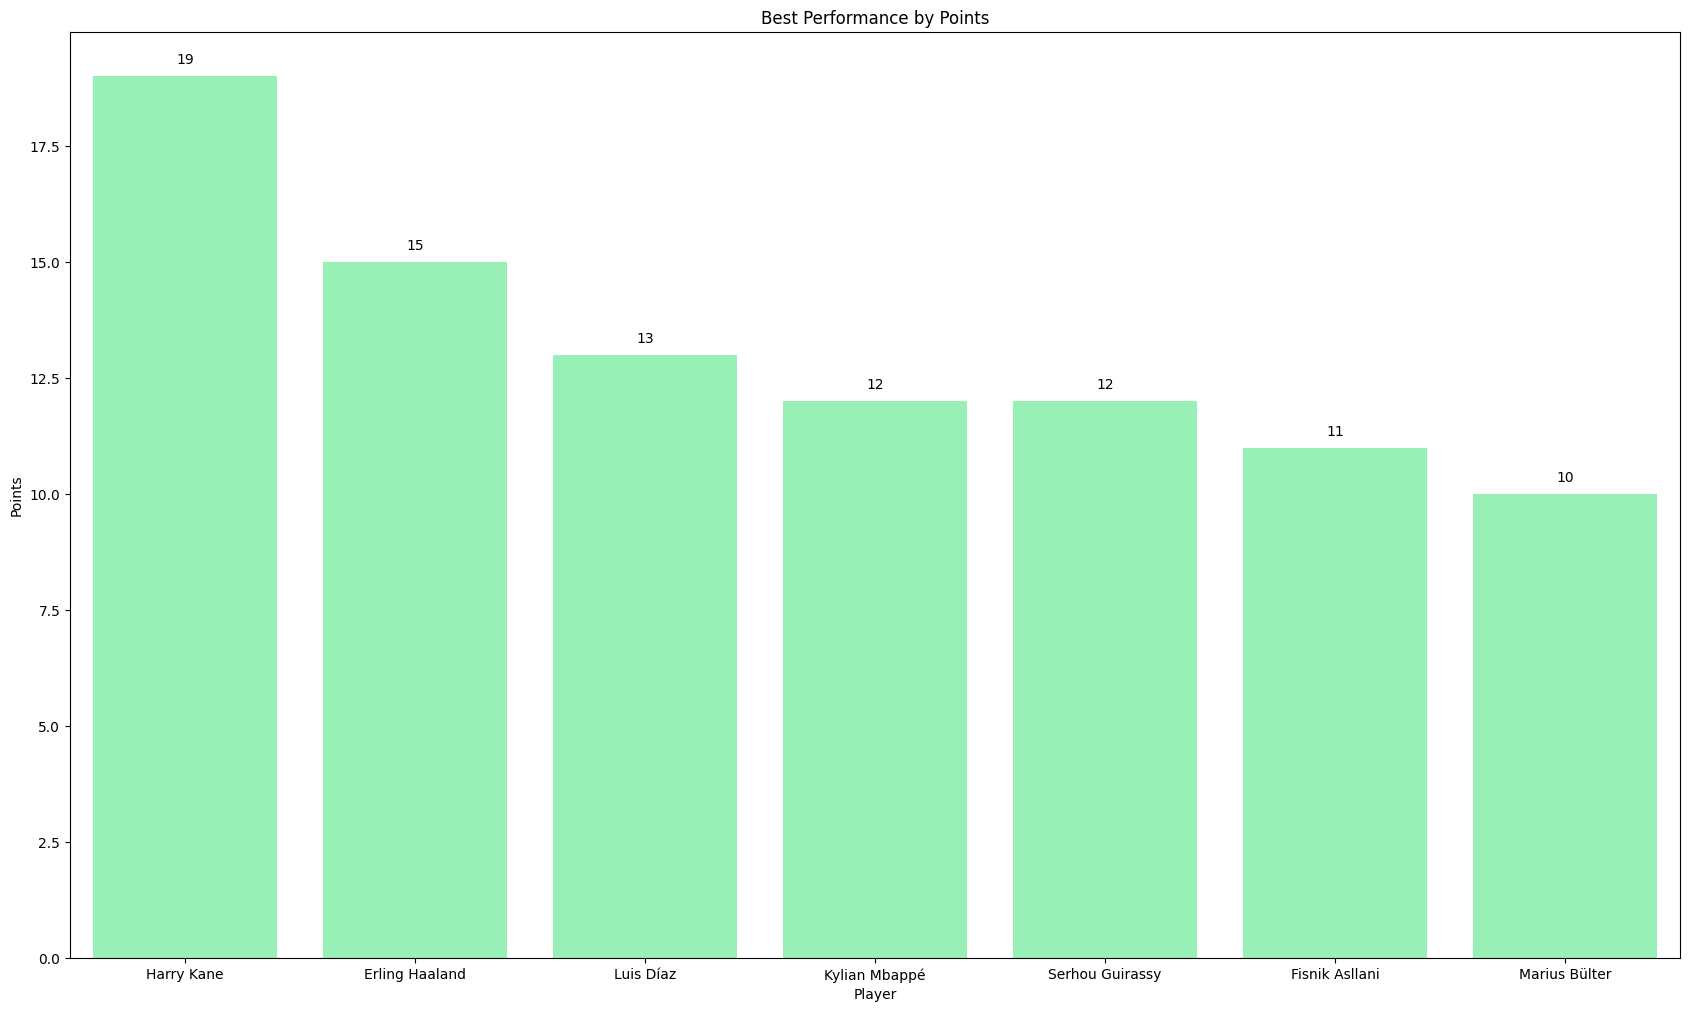

In [133]:
# Best Performance [Points]
temp=best[best["Points"]>=10].head(10)
plt.figure(figsize=(17,10))
sns.barplot(x=temp["Player"],y=temp["Points"],color='#8AFFB1')
plt.tight_layout()
plt.title("Best Performance by Points")
for i, v in enumerate(temp["Points"]):
    plt.text(i,v+0.2,str(v),ha='center',va='bottom')

In [134]:
# The Best 5 Forwards in the first 4 Games 
print(f"The Best 5 Forwards in the first 4 Games  : \n 1 : {best['Player'][1]} \n 2 : {best['Player'][2]} \n 3 : {best['Player'][3]} \n 4 : {best['Player'][4]} \n 5 : {best['Player'][5]}")

The Best 5 Forwards in the first 4 Games  : 
 1 : Harry Kane 
 2 : Erling Haaland 
 3 : Luis Díaz 
 4 : Kylian Mbappé 
 5 : Serhou Guirassy


In [135]:
# The best league by points
best_league=best.groupby("Comp").agg(
    Points=("Points",'sum'),
    Players=("Player",'count'),
    Age=("Age",'mean'),
    Goals=("Gls",'sum'),
    Assist=("Ast",'sum'),
    Goals_exp_pen=("G-PK",'sum'),
    
).sort_values(by='Points',ascending=False).reset_index().rename(lambda x:x+1)
best_league



,Comp,Points,Players,Age,Goals,Assist,Goals_exp_pen
1,eng Premier League,167,93,25.010753,45,21,40
2,es La Liga,149,75,25.986667,41,19,35
3,de Bundesliga,145,63,24.541837,39,21,32
4,fr Ligue 1,132,62,23.838710,36,17,31
5,it Serie A,74,70,26.073368,18,13,15


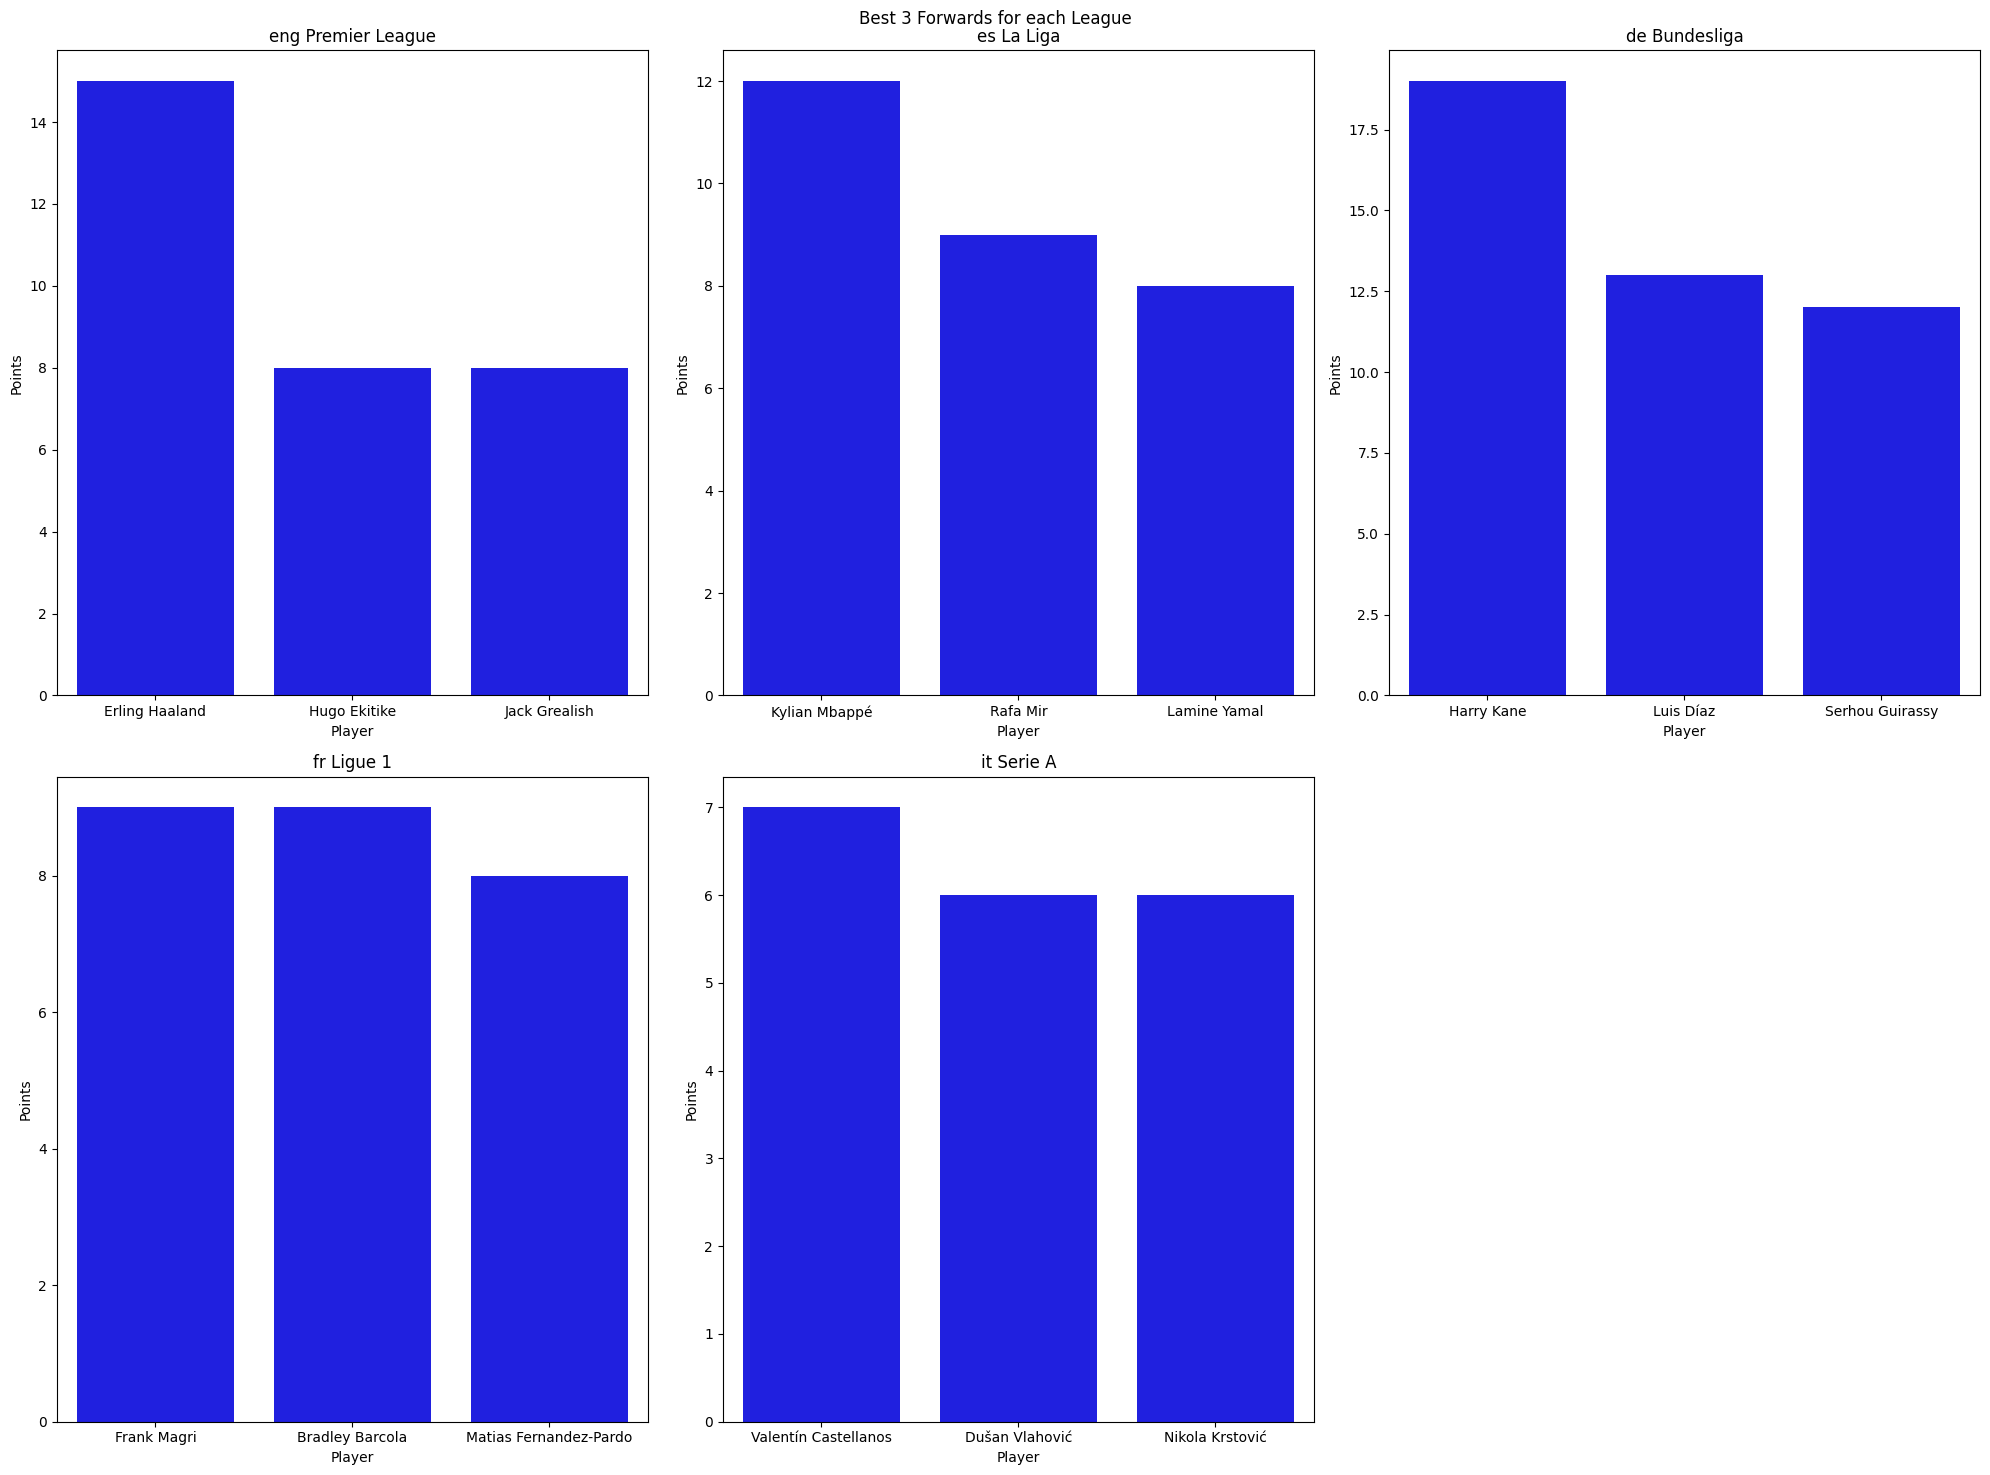

In [214]:
# Best 3 Forwards for each League
fig,axes=plt.subplots(2,3,figsize=(20,15))
axes=axes.flatten()
leagues=list(best_league["Comp"])
new=best[best['Points']>0]
for i , l in enumerate(leagues):
    data=new[new["Comp"]==l]
    data=data.sort_values(by='Points',ascending=False).head(3)
    sns.barplot(x=data["Player"],y=data["Points"],ax=axes[i],color='blue')
    axes[i].set_title(l)
for j in range(i+1,len(axes)):
    fig.delaxes(axes[j])
plt.suptitle("Best 3 Forwards for each League")
plt.tight_layout()



Text(0.5, 1.0, 'Average Age Of Each League')

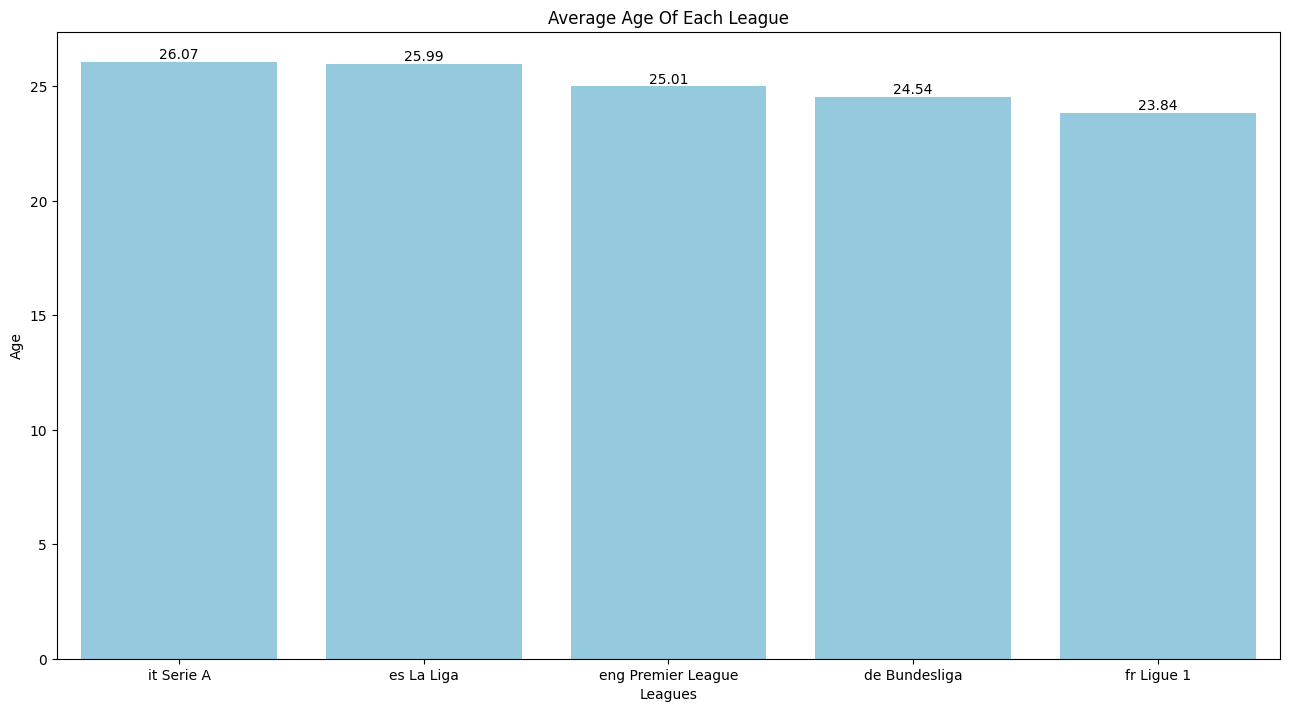

In [220]:
# Average Age Of Each League
temp=best_league.sort_values(by='Age',ascending=False)
plt.figure(figsize=(13,7))
sns.barplot(x=temp["Comp"],y=temp["Age"],color='skyblue')
for i , v in enumerate(temp["Age"]):
    plt.text(i,v,f"{v:,.2f}",ha='center',va='bottom')
plt.xlabel("Leagues")
plt.tight_layout()
plt.title("Average Age Of Each League")

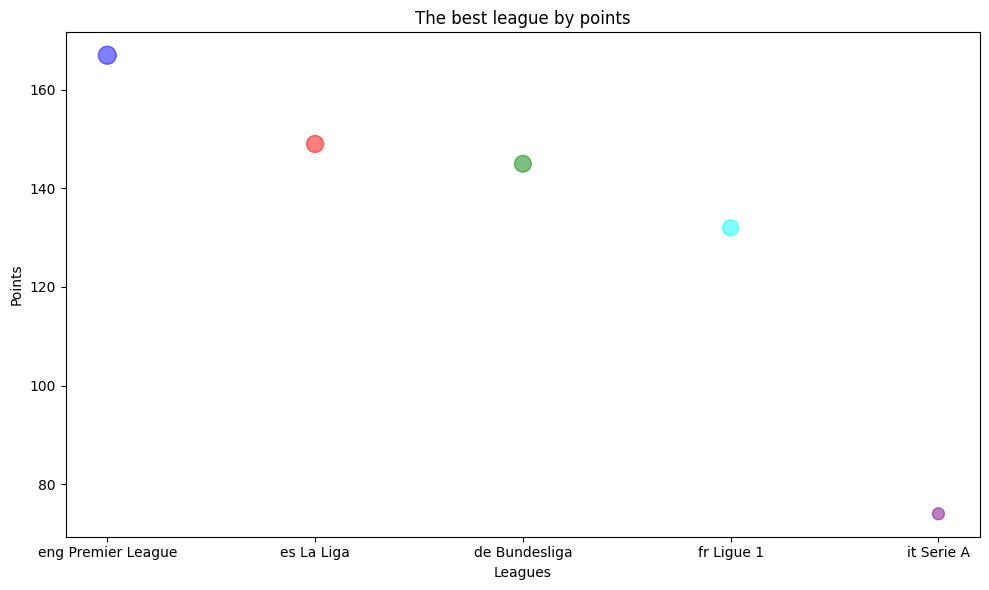

In [138]:
# The best league by points
plt.figure(figsize=(10,6))
plt.scatter(x=best_league["Comp"],y=best_league["Points"], color=['blue','red','green','cyan','purple'],s=best_league["Points"],alpha=0.5,)
plt.title("The best league by points")
plt.xlabel("Leagues")
plt.ylabel("Points")
plt.tight_layout()


In [139]:
print(f"The Best 5 Leagues  : \n 1 : {best_league['Comp'][1]} with {best_league['Points'][1]} points \n 2 : {best_league['Comp'][2]} with {best_league['Points'][2]} points \n 3 : {best_league['Comp'][3]} with {best_league['Points'][3]} points\n 4 : {best_league['Comp'][4]} with {best_league['Points'][4]} points\n 5 : {best_league['Comp'][5]} with {best_league['Points'][5]} points")

The Best 5 Leagues  : 
 1 : eng Premier League with 167 points 
 2 : es La Liga with 149 points 
 3 : de Bundesliga with 145 points
 4 : fr Ligue 1 with 132 points
 5 : it Serie A with 74 points


In [164]:
# The best Nation by points
best_nation=best.groupby("Nation").agg(
    Points=("Points",'sum'),
    Players=("Player",'count'),
    Age=("Age",'mean'),
    Goals=("Gls",'sum'),
    Assist=("Ast",'sum'),
    Goals_exp_pen=("G-PK",'sum'),
       
).sort_values(by='Points',ascending=False).reset_index().rename(lambda x:x+1)
best_nation=best_nation[best_nation["Points"]>=18]
best_nation

,Nation,Points,Players,Age,Goals,Assist,Goals_exp_pen
1,FRA,81,32,24.281250,27,5,22
2,ESP,73,37,25.486486,23,7,18
3,ENG,56,34,25.117647,12,14,8
4,GER,37,26,24.505221,9,7,7
5,ARG,29,12,24.333333,5,7,5
6,BEL,27,10,24.300000,5,6,5
7,BRA,25,16,24.187500,7,3,6
8,ITA,21,26,25.807692,9,0,6
9,CMR,19,5,21.600000,5,2,5
10,NOR,18,6,23.333333,6,0,6


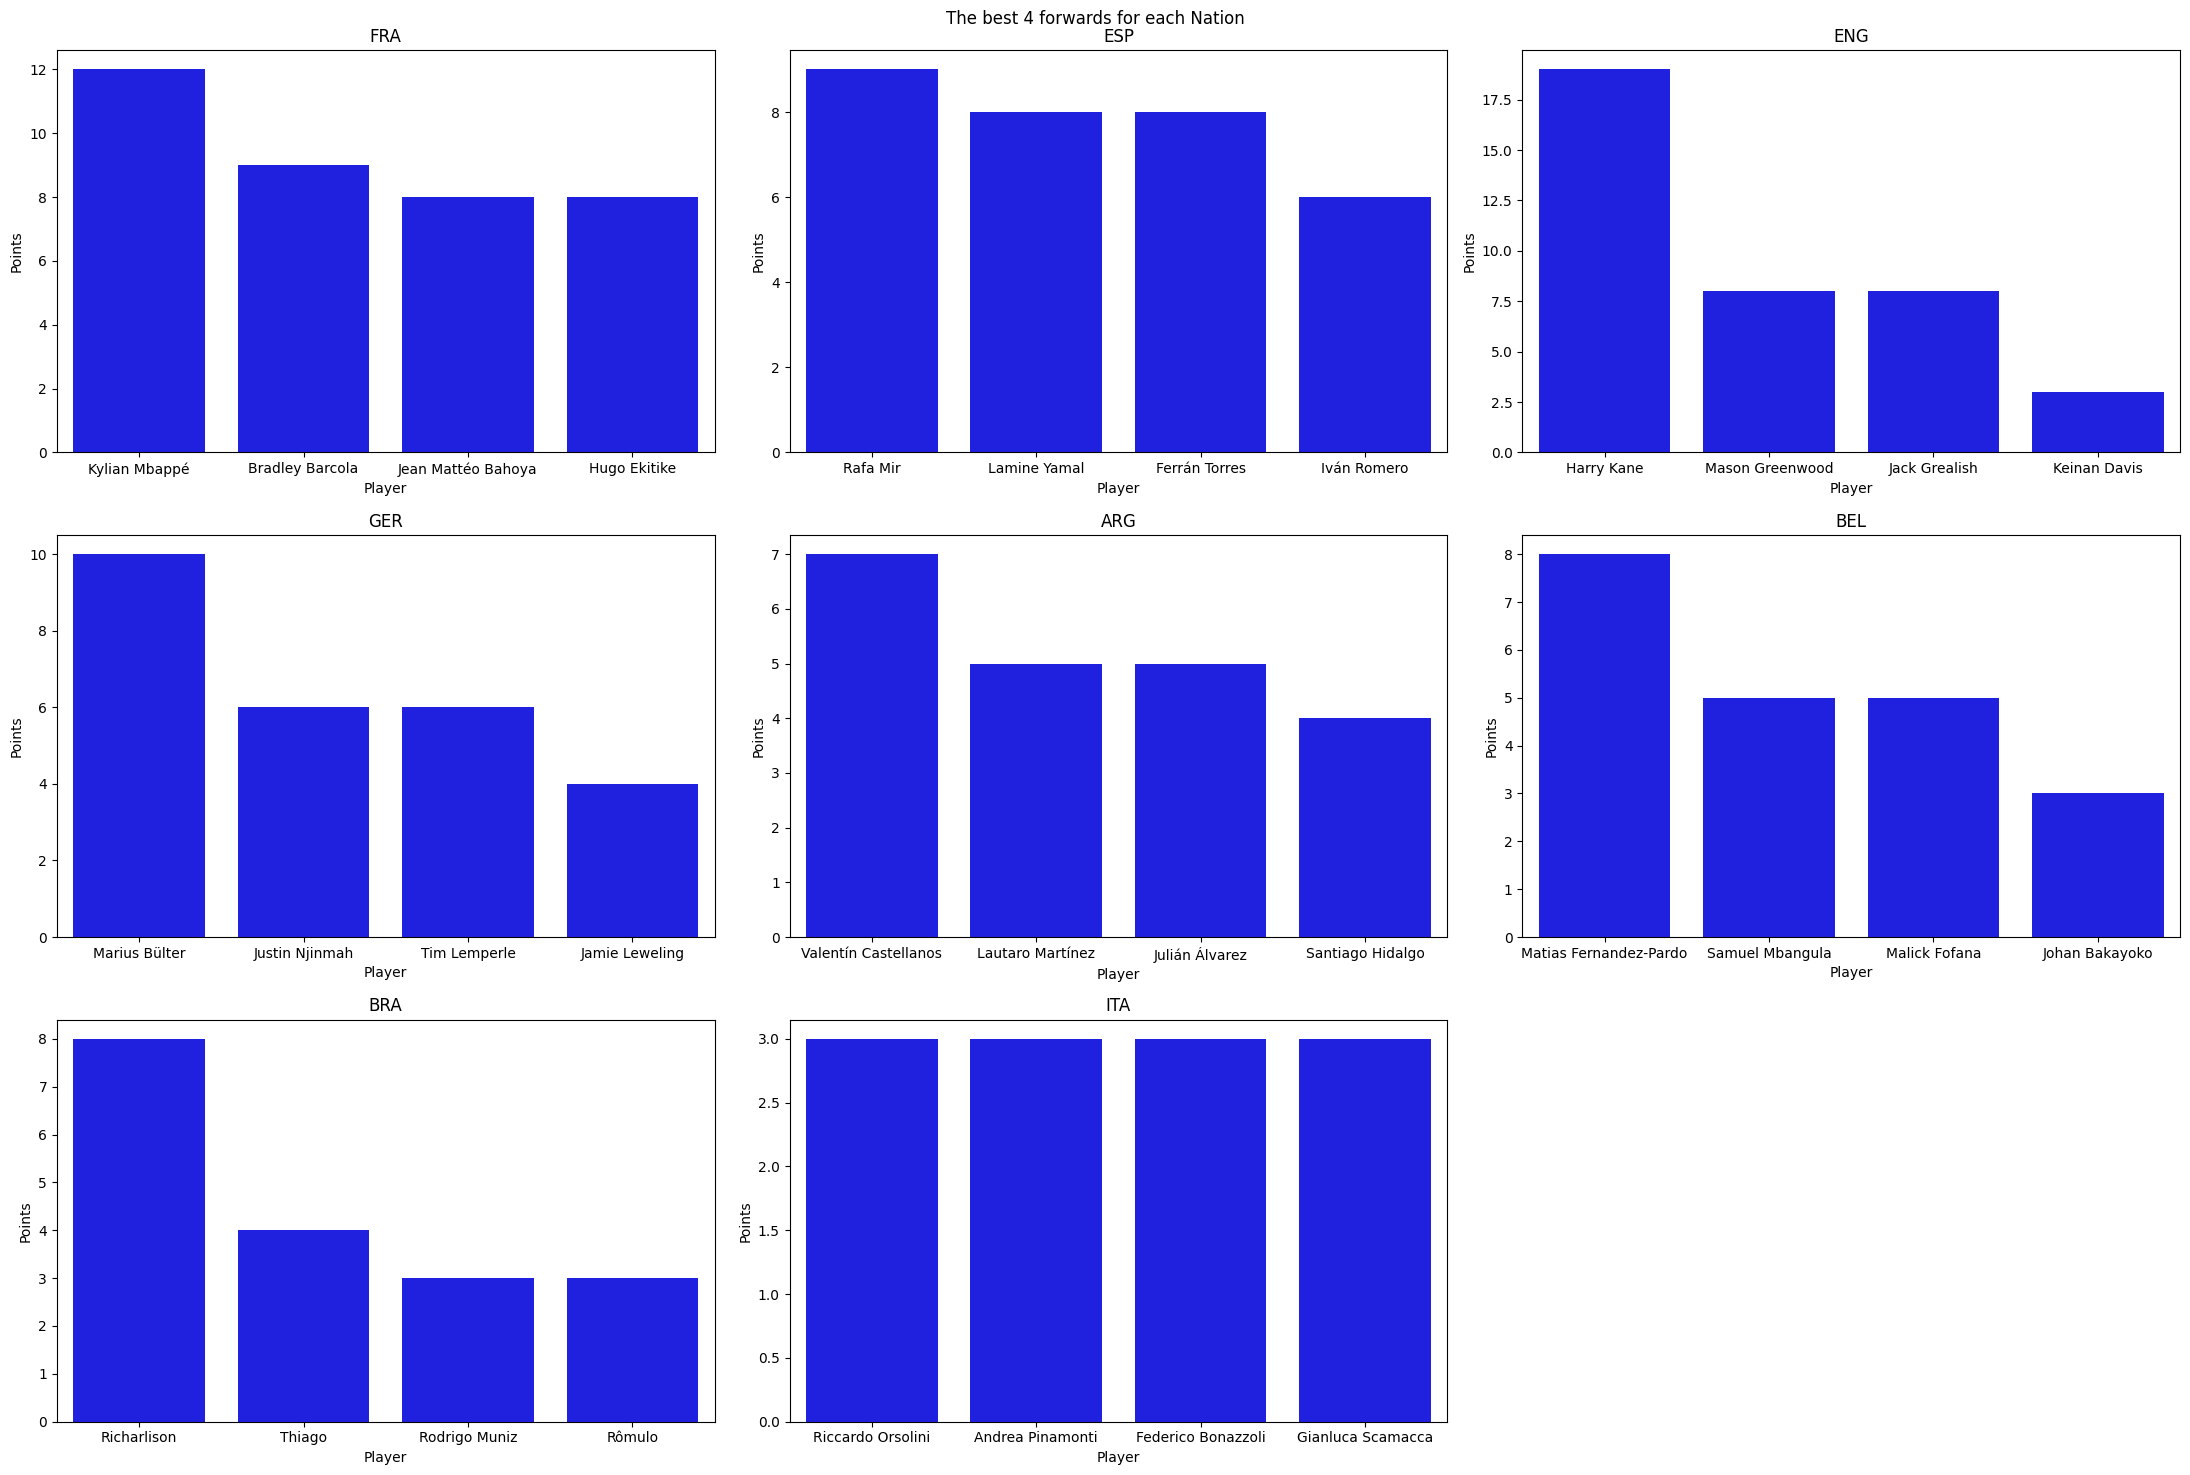

In [215]:
# The best 4 forwards for each Nation
nations=best_nation["Nation"].head(8)
nations=list(nations)
fig,axes=plt.subplots(3,3,figsize=(22,15))
axes=axes.flatten()
for i,nation in enumerate(nations):
    data=new[new["Nation"]==nation]
    data=data.sort_values(by='Points',ascending=False).head(4)
    sns.barplot(x=data["Player"],y=data["Points"],ax=axes[i],color='blue')
    axes[i].set_title(nation)
for j in range(i+1,len(axes)):
    fig.delaxes(axes[j])
plt.suptitle("The best 4 forwards for each Nation")
plt.tight_layout()


Text(0.5, 1.0, 'Average Age Of Each Nation')

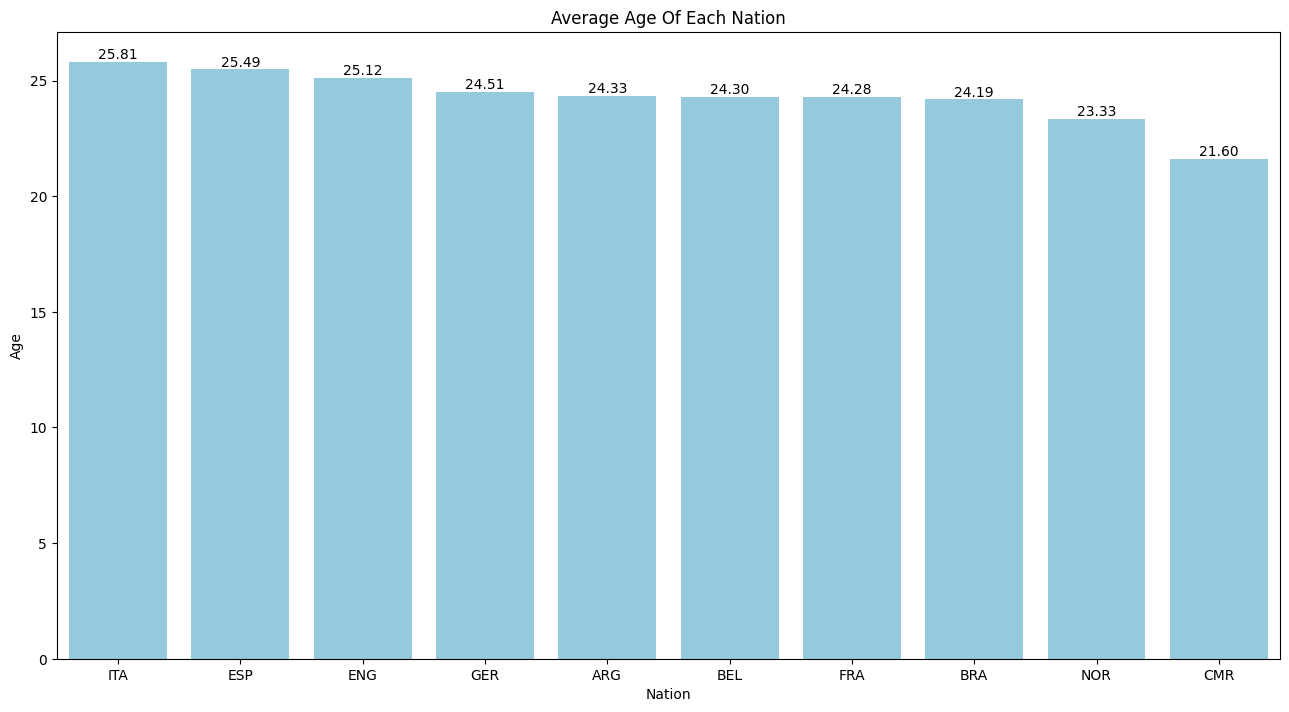

In [219]:
# Average Age Of Each Nation
temp=best_nation.sort_values(by='Age',ascending=False)
plt.figure(figsize=(13,7))
sns.barplot(x=temp["Nation"],y=temp["Age"],color='skyblue')
for i , v in enumerate(temp["Age"]):
    plt.text(i,v,f"{v:,.2f}",ha='center',va='bottom')
plt.xlabel("Nation")
plt.tight_layout()
plt.title("Average Age Of Each Nation")

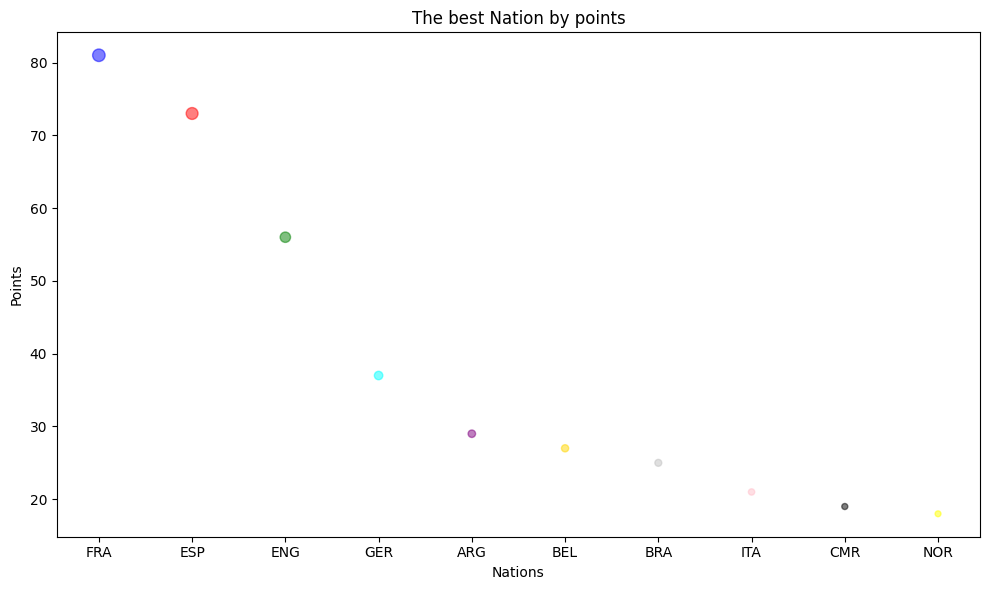

In [143]:
# The best Nation by points
plt.figure(figsize=(10,6))
plt.scatter(x=best_nation["Nation"],y=best_nation["Points"], color=['blue','red','green','cyan','purple','gold','silver','pink','black','yellow'],s=best_nation["Points"],alpha=0.5,)
plt.title("The best Nation by points")
plt.xlabel("Nations")
plt.ylabel("Points")
plt.tight_layout()


In [144]:
print(f"The Best 5 Nations  : \n 1 : {best_nation['Nation'][1]} with {best_nation['Points'][1]} points \n 2 : {best_nation['Nation'][2]} with {best_nation['Points'][2]} points \n 3 : {best_nation['Nation'][3]} with {best_nation['Points'][3]} points\n 4 : {best_nation['Nation'][4]} with {best_nation['Points'][4]} points\n 5 : {best_nation['Nation'][5]} with {best_nation['Points'][5]} points")

The Best 5 Nations  : 
 1 : FRA with 81 points 
 2 : ESP with 73 points 
 3 : ENG with 56 points
 4 : GER with 37 points
 5 : ARG with 29 points


In [169]:
# The best team by points 
best_team=best.groupby("Squad").agg(
    Points=("Points",'sum'),
    Players=("Player",'count'),
    Age=("Age",'mean'),
    Goals=("Gls",'sum'),
    Assist=("Ast",'sum'),
    Goals_exp_pen=("G-PK",'sum'),
).sort_values(by='Points',ascending=False).reset_index().rename(lambda x:x+1)
best_team.head(10)

,Squad,Points,Players,Age,Goals,Assist,Goals_exp_pen
1,Bayern Munich,32,5,23.800000,8,5,7
2,Lille,28,7,23.714286,6,5,6
3,Barcelona,24,5,25.200000,6,4,5
4,Liverpool,24,4,27.250000,6,4,5
5,Hoffenheim,19,4,22.533934,5,3,4
6,Marseille,17,5,24.800000,5,3,3
7,Everton,17,6,26.833333,3,4,3
8,Werder Bremen,17,6,23.000000,3,4,3
9,Elche,16,4,26.250000,4,2,4
10,Tottenham,16,5,24.400000,4,2,4


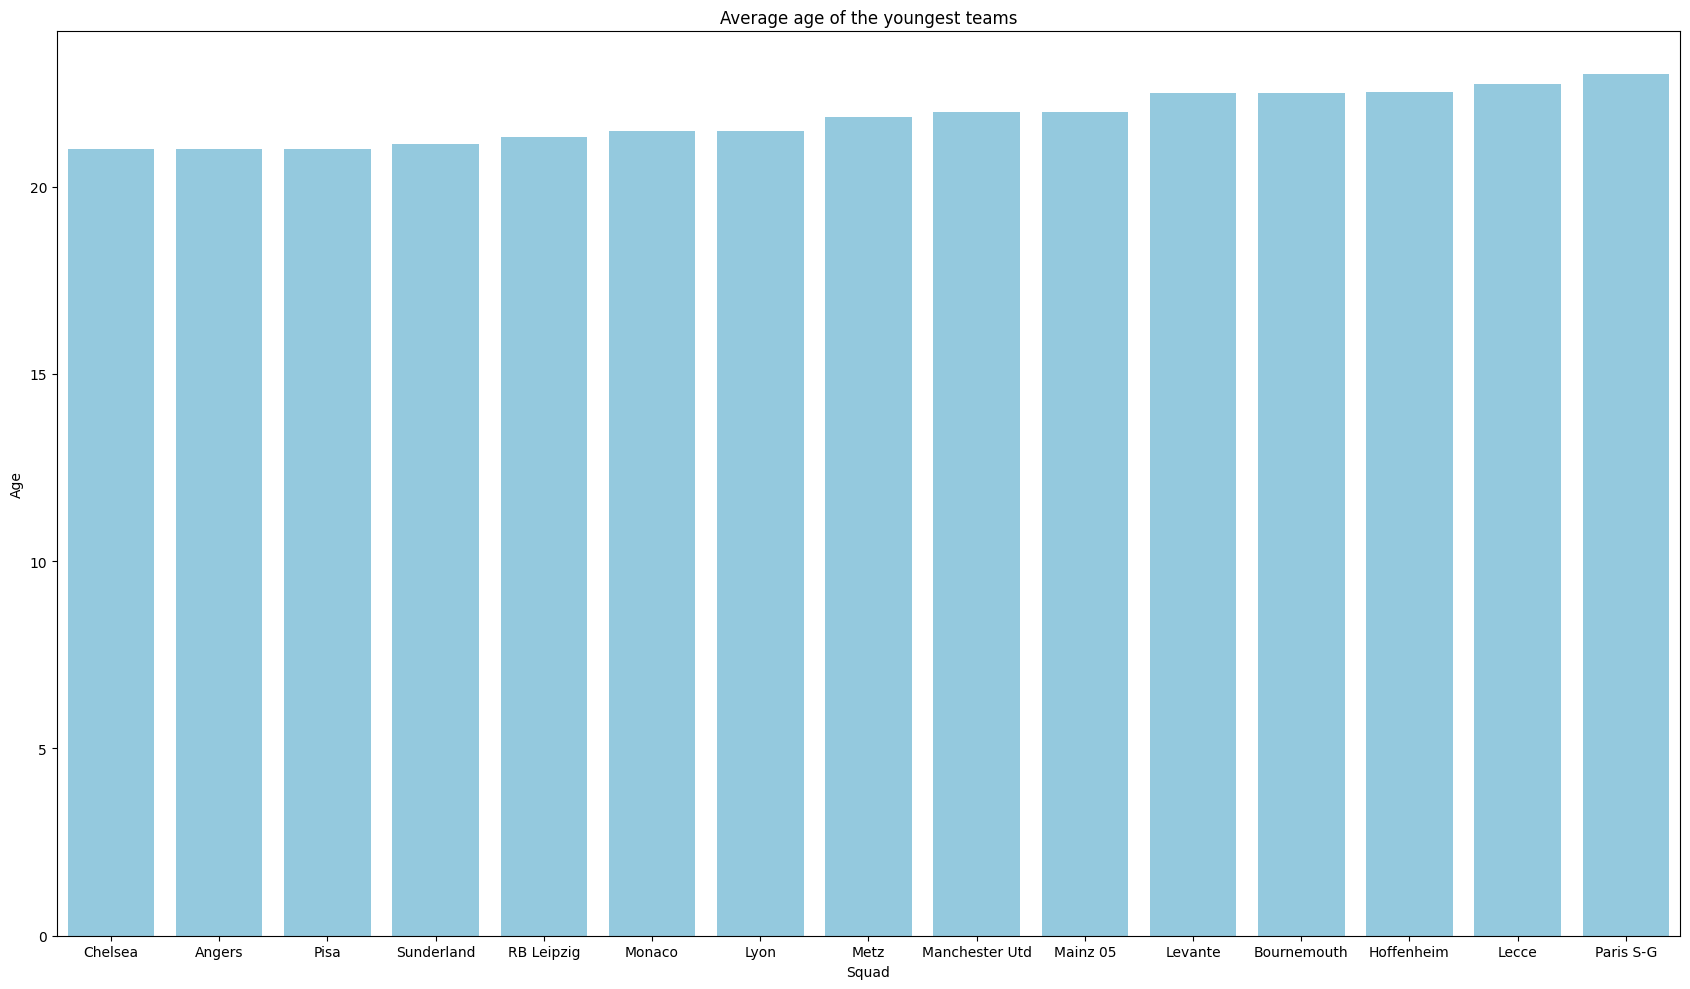

In [218]:
# Average age of the youngest teams
temp=best_team.sort_values(by='Age',ascending=True).reset_index(drop=True).rename(lambda x:x+1)
temp=temp.head(15)
plt.figure(figsize=(17,10))
sns.barplot(x=temp["Squad"],y=temp["Age"],color='skyblue')
plt.title("Average age of the youngest teams")
plt.tight_layout()

Text(0.5, 1.0, ' Best 5 Teams By Points')

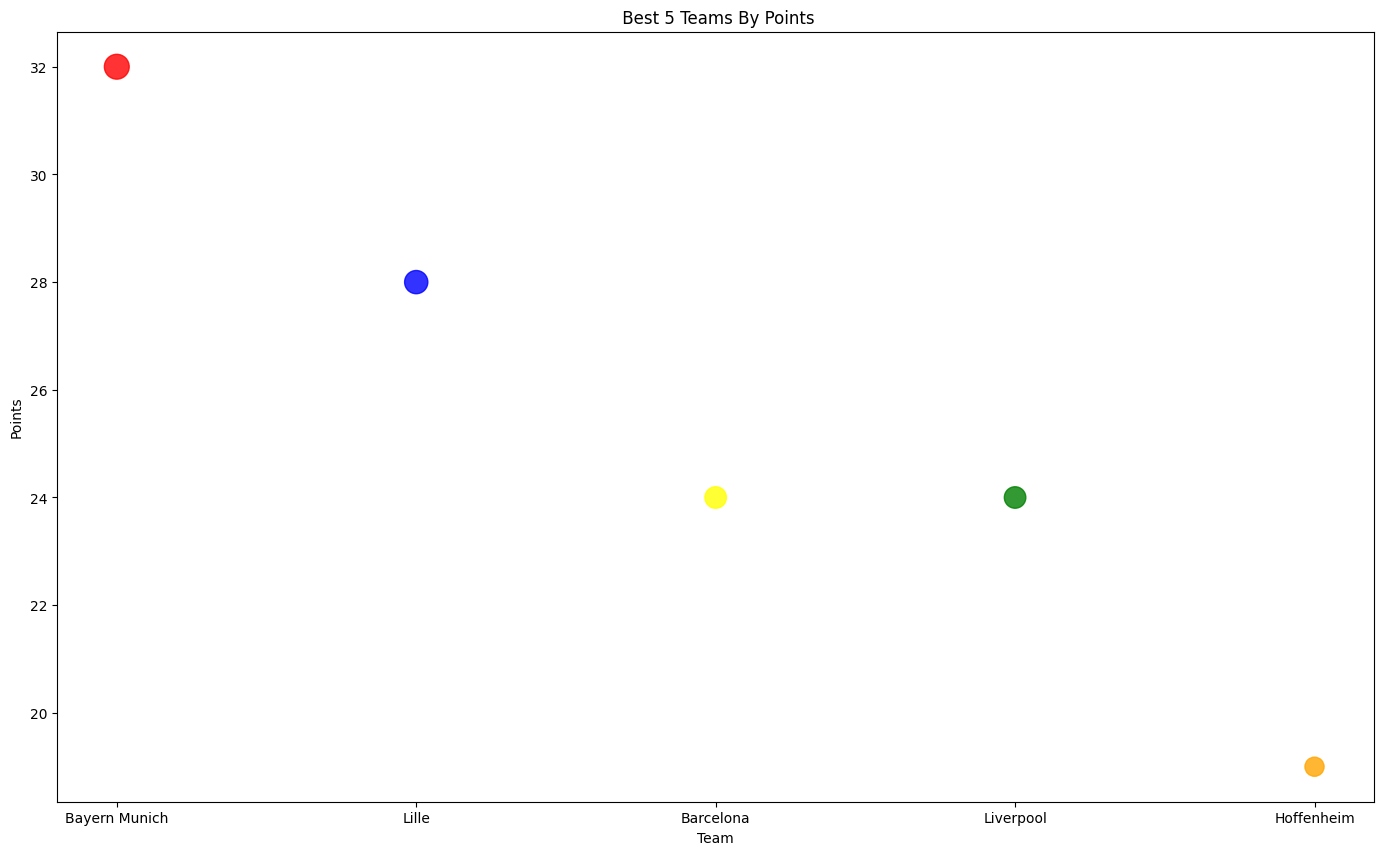

In [ ]:
# Best 5 Teams By Points
temp=best_team.head(5)
plt.figure(figsize=(17,10))
plt.scatter(temp["Squad"],temp["Points"],color=['red','blue','yellow','green','orange'],s=temp['Points']*10,alpha=0.8)
plt.xlabel("Team")
plt.ylabel("Points")
plt.title(" Best 5 Teams By Points")

In [202]:
print(f"The Best 5 Teams  : \n 1 : {best_team['Squad'][1]} with {best_team['Points'][1]} points \n 2 : {best_team['Squad'][2]} with {best_team['Points'][2]} points \n 3 : {best_team['Squad'][3]} with {best_team['Points'][3]} points\n 4 : {best_team['Squad'][4]} with {best_team['Points'][4]} points\n 5 : {best_team['Squad'][5]} with {best_team['Points'][5]} points")

The Best 5 Teams  : 
 1 : Bayern Munich with 32 points 
 2 : Lille with 28 points 
 3 : Barcelona with 24 points
 4 : Liverpool with 24 points
 5 : Hoffenheim with 19 points


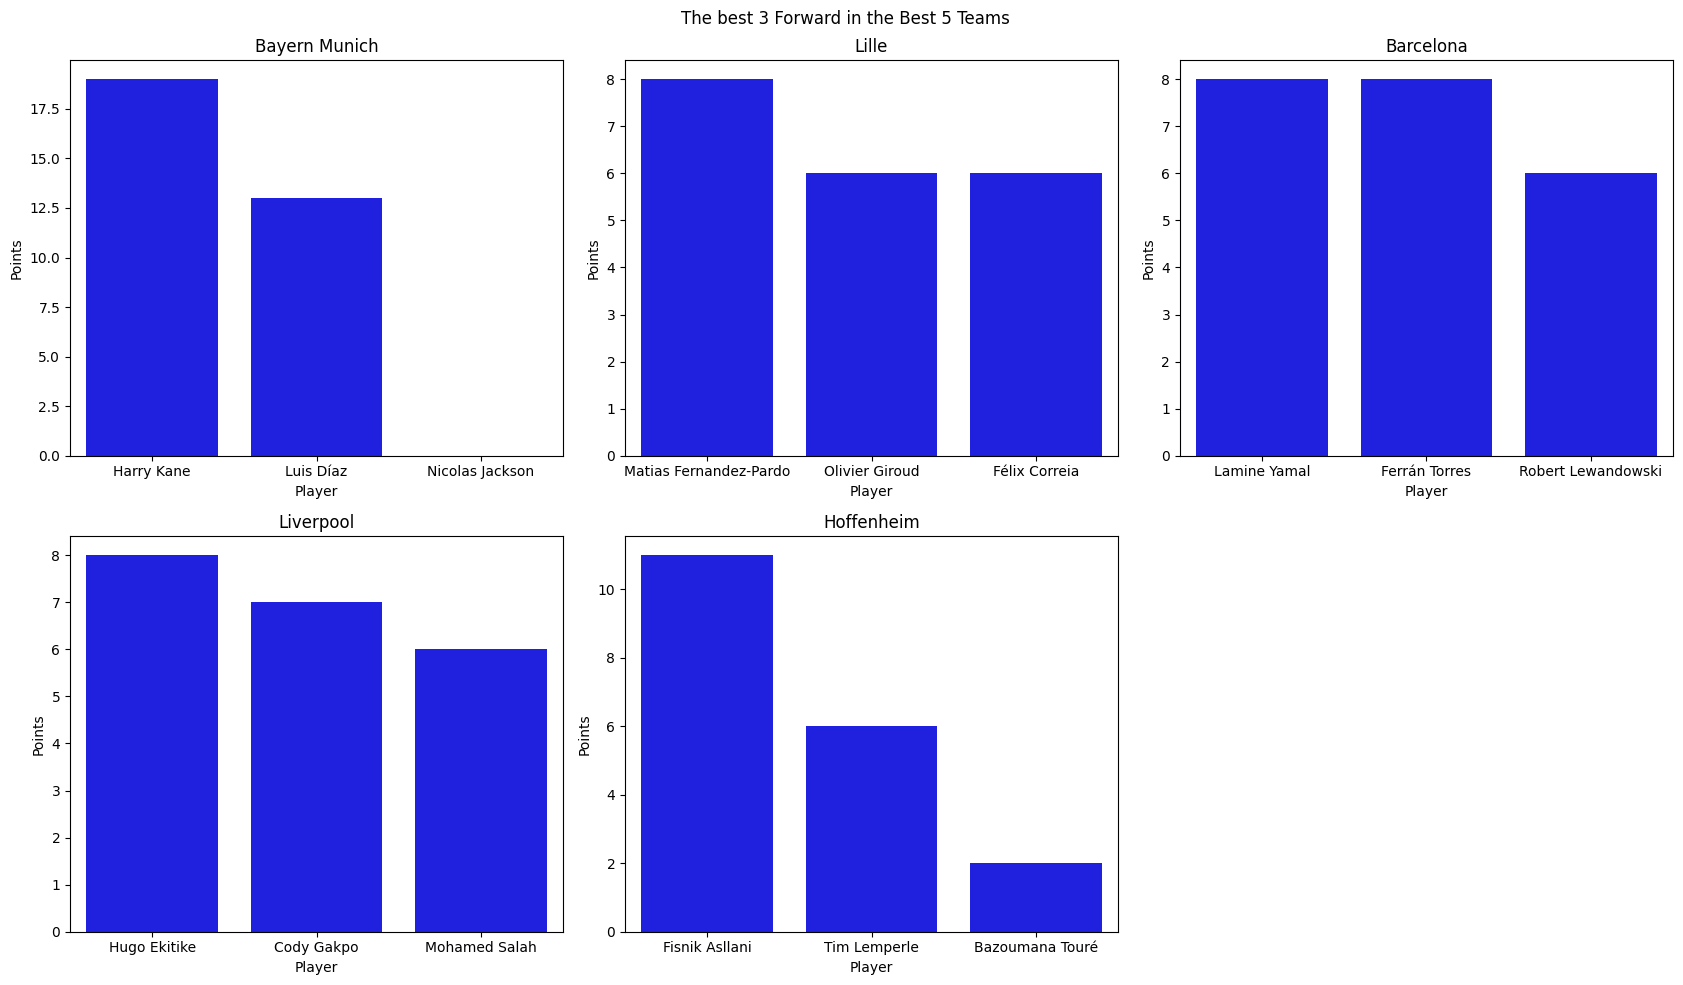

In [216]:
# The best 3 Forward in the Best 5 Teams
fig,axes=plt.subplots(2,3,figsize=(17,10))
axes=axes.flatten()
teams=list(best_team["Squad"].head())
for i ,team in enumerate(teams):
    data=best[best["Squad"]==team]
    data=data.sort_values(by='Points',ascending=False).head(3)
    sns.barplot(x=data["Player"],y=data["Points"],ax=axes[i],color='blue')
    axes[i].set_title(team)
for j in range(i+1,len(axes)):
    fig.delaxes(axes[j])
plt.suptitle("The best 3 Forward in the Best 5 Teams")
plt.tight_layout()
